# Wk 18 Lecture 02 Visualizations

> Visualizations from lecture slides

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np
import statsmodels.tsa.api as tsa

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
plt.rcParams['figure.figsize'] = (12,5)

fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.05}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

## Stock Data


In [58]:
df = pd.read_csv('Data/FromClass/SP500-Close-Prices.csv',
                 parse_dates=['Datetime'], index_col=['Datetime'])
df

,BidClose,AskClose
Datetime,,
2018-01-02 09:29:00,102.33,102.67
2018-01-02 09:30:00,102.52,102.53
2018-01-02 09:31:00,102.53,102.55
2018-01-02 09:32:00,102.58,102.59
2018-01-02 09:33:00,102.51,102.52
...,...,...
2023-01-27 15:56:00,154.48,154.49
2023-01-27 15:57:00,154.44,154.45
2023-01-27 15:58:00,154.46,154.47


In [59]:
ts = df['AskClose'].copy()
ts

Datetime
2018-01-02 09:29:00    102.67
2018-01-02 09:30:00    102.53
2018-01-02 09:31:00    102.55
2018-01-02 09:32:00    102.59
2018-01-02 09:33:00    102.52
                        ...  
2023-01-27 15:56:00    154.49
2023-01-27 15:57:00    154.45
2023-01-27 15:58:00    154.47
2023-01-27 15:59:00    154.50
2023-01-27 16:00:00    154.49
Name: AskClose, Length: 445762, dtype: float64

In [60]:
def format_xdates_stocks(ax, bold_ticks=True):
    
    # Create a year locator
    loc_major_yr = mdates.YearLocator()
    # Create a year formatter using 4-digit years
    fmt_major_yr = mdates.DateFormatter("%Y")


    # Create a month locator that will add months at 1,4,7,10
    loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])
    # Createa monthnformatter that will use 3-letter month names
    fmt_minor_3m = mdates.DateFormatter("%b")
    

    
    # Set xaxis major locator/formatter
    ax.xaxis.set_major_locator(loc_major_yr)
    ax.xaxis.set_major_formatter(fmt_major_yr)


    # Set xaxis minor locator/formatter
    ax.xaxis.set_minor_locator(loc_minor_3m)
    ax.xaxis.set_minor_formatter(fmt_minor_3m)

    
    ## 
    if bold_ticks==True:
        ax.set_xticklabels(ax.get_xticklabels(), fontweight='semibold')
    

    # Add gridlines for major xaxis ticks
    ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

    ## Rotate the major tick years using fig.autofmt_xdate
    fig = ax.get_figure()
    fig.autofmt_xdate(which='major', rotation=90,ha='center')
    return fig


In [61]:
fmt_usd = mticks.StrMethodFormatter("${x:.0f}")
fmt_usd

In [62]:
fmt_pct = mticks.StrMethodFormatter("{x:.0f}%")
fmt_pct

In [63]:
def quick_ts_plot(ts,title='S&P 500 Index', ylabel='Price',style='-',
                  bold_ticks=True,
                 ax=None, legend=False, label=None,
                 plot_kws={}):
    if ax is None:
        ## Starter Plot
        ax = ts.plot(label=label,style=style, **plot_kws);
    else:
        ts.plot(ax=ax,style=style, label=label,  **plot_kws)
        
    ax.set(title=title, ylabel=ylabel);
    format_xdates_stocks(ax, bold_ticks = bold_ticks);
    
    if legend==True:
        ax.legend()
    return ax

## Time Series Statistics

In [64]:
ts = ts.resample("D").last()
ts = ts.fillna(method='ffill')
ts

Datetime
2018-01-02    102.79
2018-01-03    103.21
2018-01-04    103.76
2018-01-05    104.09
2018-01-06    104.09
               ...  
2023-01-23    155.73
2023-01-24    152.65
2023-01-25    152.92
2023-01-26    154.19
2023-01-27    154.49
Freq: D, Name: AskClose, Length: 1852, dtype: float64

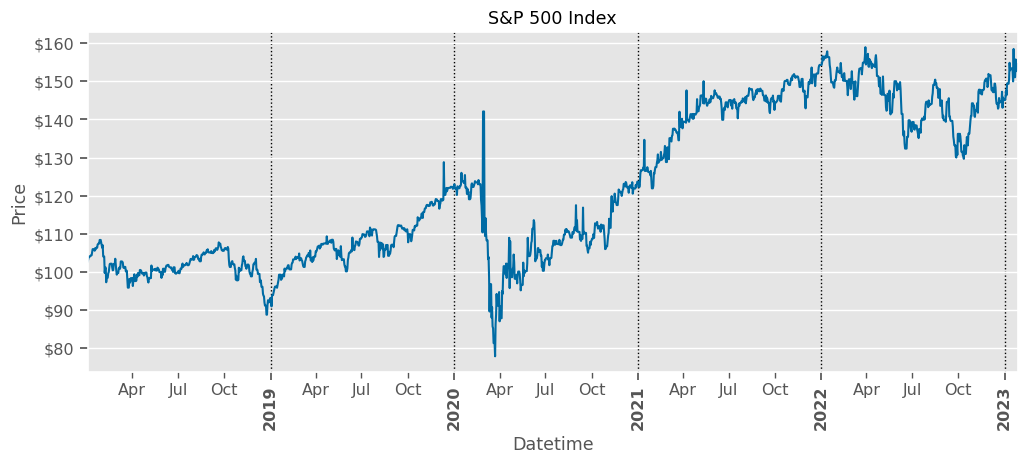

In [65]:
ax = quick_ts_plot(ts)
ax.yaxis.set_major_formatter(fmt_usd)

<Axes: xlabel='Datetime'>

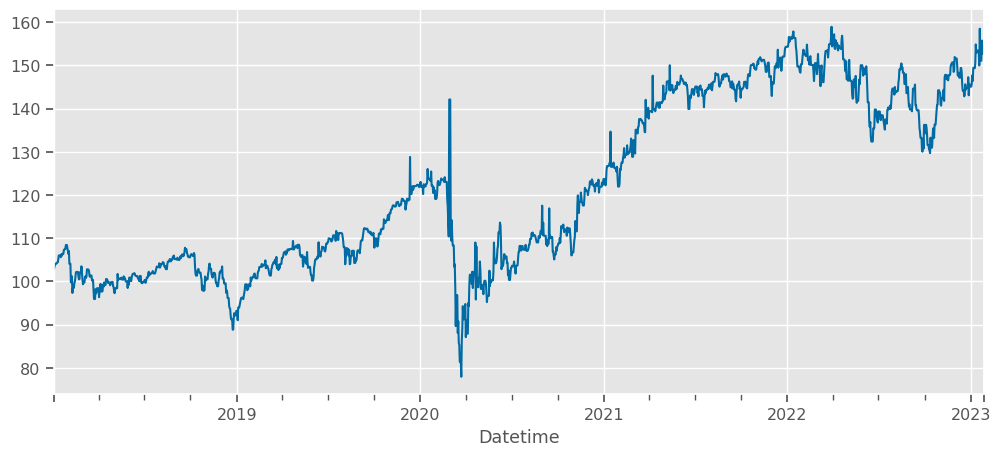

In [67]:
ts.plot()

### Use `.diff()` to convert overall value to change in value

In [12]:
ts

Datetime
2018-01-02    102.79
2018-01-03    103.21
2018-01-04    103.76
2018-01-05    104.09
2018-01-06    104.09
               ...  
2023-01-23    155.73
2023-01-24    152.65
2023-01-25    152.92
2023-01-26    154.19
2023-01-27    154.49
Freq: D, Name: AskClose, Length: 1852, dtype: float64

In [13]:
## change in value
delta_ts = ts.diff()
delta_ts

Datetime
2018-01-02     NaN
2018-01-03    0.42
2018-01-04    0.55
2018-01-05    0.33
2018-01-06    0.00
              ... 
2023-01-23    4.66
2023-01-24   -3.08
2023-01-25    0.27
2023-01-26    1.27
2023-01-27    0.30
Freq: D, Name: AskClose, Length: 1852, dtype: float64

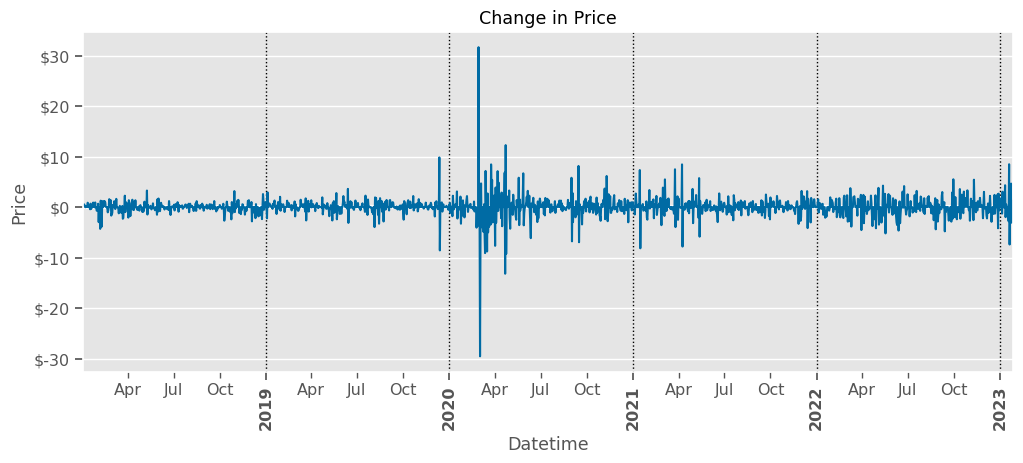

In [14]:
ax = quick_ts_plot(delta_ts, title="Change in Price")
ax.yaxis.set_major_formatter(fmt_usd)
ax.axhline(0,color='white',lw=3,zorder=0)

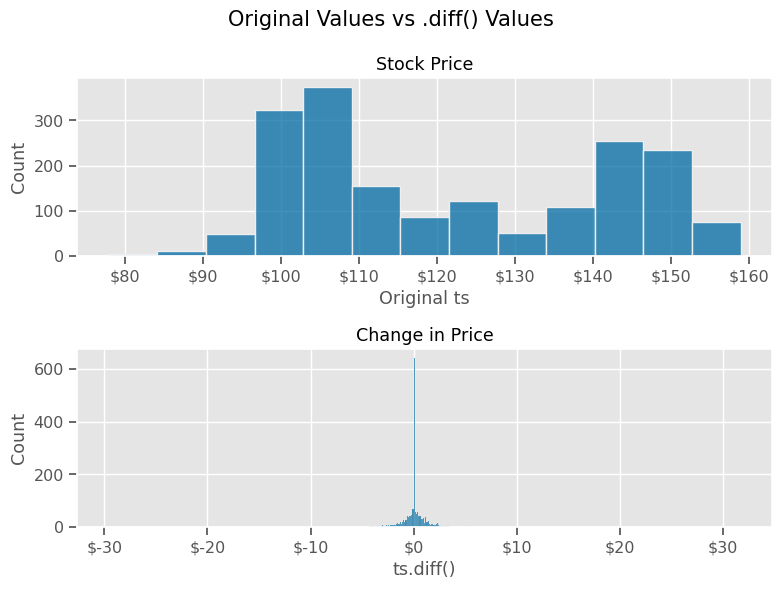

In [15]:
fig, axes = plt.subplots(nrows=2, figsize=(8,6))
fig.suptitle("Original Values vs .diff() Values")

sns.histplot(ts, ax=axes[0])
axes[0].set(xlabel='Original ts', title ='Stock Price')
axes[0].xaxis.set_major_formatter(fmt_usd)

sns.histplot(delta_ts.values, ax=axes[1])
axes[1].set(title='Change in Price', xlabel='ts.diff()')
axes[1].xaxis.set_major_formatter(fmt_usd)

plt.tight_layout()

### Use `.cumsum()` to calculate cumulative sum 
- Essentially the opposite of .diff()

In [16]:
delta_ts_summed = delta_ts.cumsum()
delta_ts_summed

Datetime
2018-01-02      NaN
2018-01-03     0.42
2018-01-04     0.97
2018-01-05     1.30
2018-01-06     1.30
              ...  
2023-01-23    52.94
2023-01-24    49.86
2023-01-25    50.13
2023-01-26    51.40
2023-01-27    51.70
Freq: D, Name: AskClose, Length: 1852, dtype: float64

<Axes: title={'center': 'delta_ts.cumsum()'}, xlabel='Datetime', ylabel='Price'>

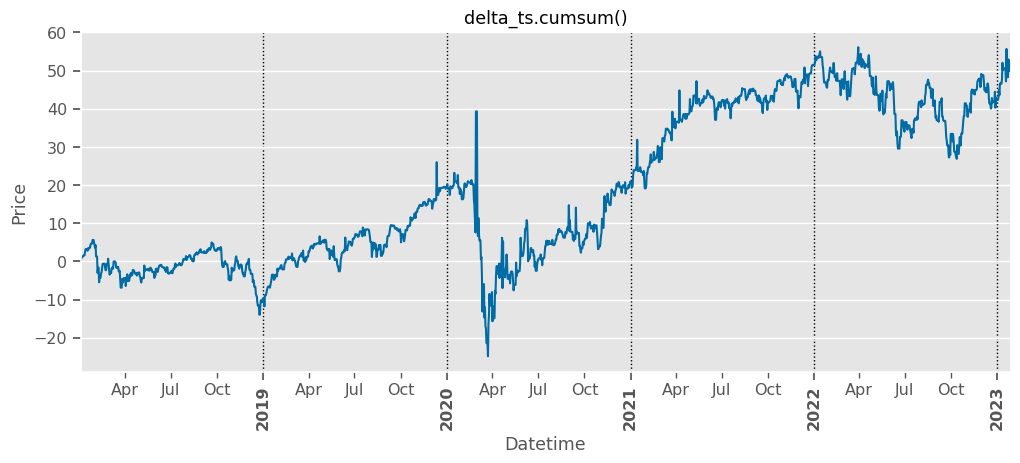

In [17]:
quick_ts_plot(delta_ts_summed, title='delta_ts.cumsum()')

In [91]:
ts.diff().cumsum()

Datetime
2018-01-02      NaN
2018-01-03     0.42
2018-01-04     0.97
2018-01-05     1.30
2018-01-06     1.30
              ...  
2023-01-23    52.94
2023-01-24    49.86
2023-01-25    50.13
2023-01-26    51.40
2023-01-27    51.70
Freq: D, Name: AskClose, Length: 1852, dtype: float64

<Axes: xlabel='Datetime'>

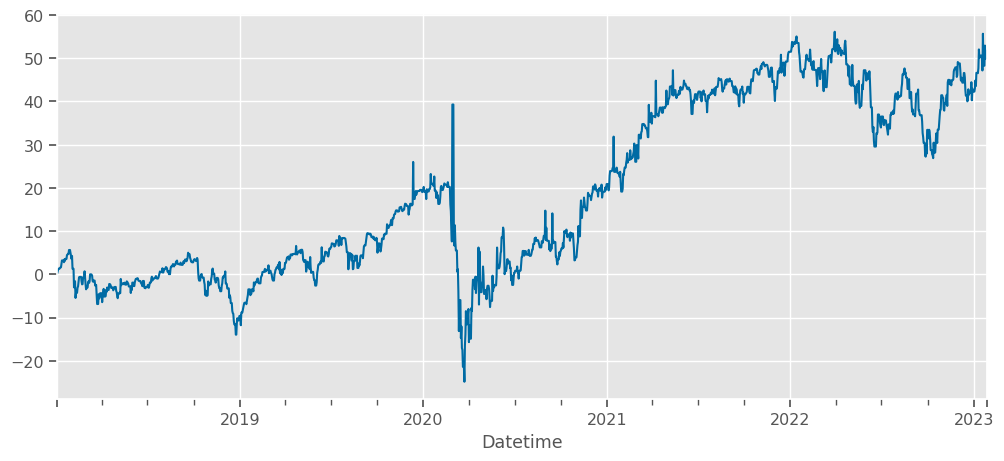

In [90]:
ts.diff().cumsum().plot()

### Use `.pct_change()` to convert overall value to percent change in value

In [18]:
## percent change (as % instead of ratio)
pct_change_ts = ts.pct_change() * 100
pct_change_ts

Datetime
2018-01-02         NaN
2018-01-03    0.408600
2018-01-04    0.532894
2018-01-05    0.318042
2018-01-06    0.000000
                ...   
2023-01-23    3.084663
2023-01-24   -1.977782
2023-01-25    0.176875
2023-01-26    0.830500
2023-01-27    0.194565
Freq: D, Name: AskClose, Length: 1852, dtype: float64

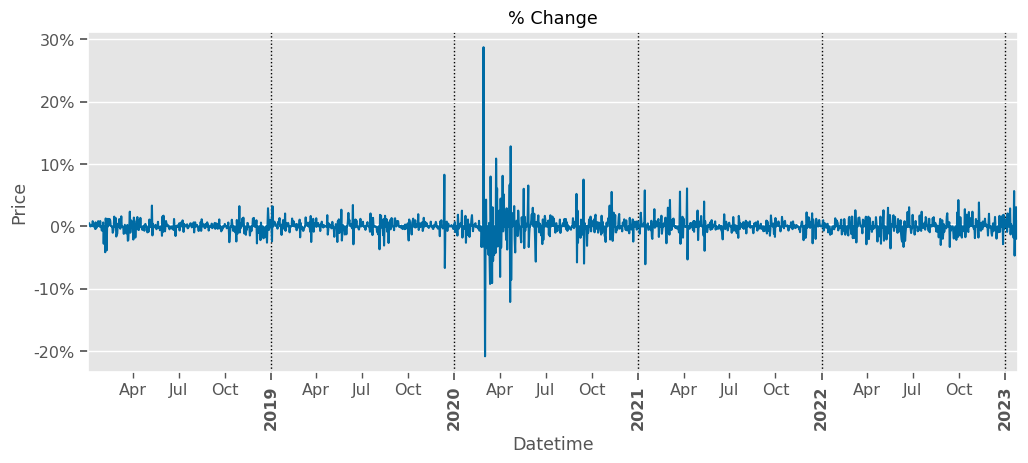

In [19]:
ax = quick_ts_plot(pct_change_ts,title='% Change')
ax.yaxis.set_major_formatter(fmt_pct)
ax.axhline(0,color='white',lw=3,zorder=0)

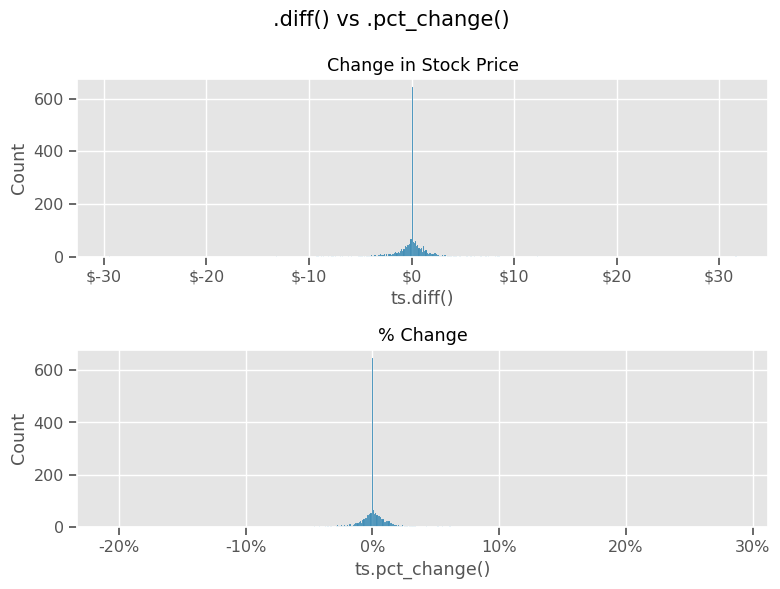

In [20]:
fig, axes = plt.subplots(nrows=2, figsize=(8,6))
fig.suptitle(".diff() vs .pct_change()")

sns.histplot(delta_ts, ax=axes[0])
axes[0].set(xlabel='ts.diff()', title ='Change in Stock Price')
axes[0].xaxis.set_major_formatter(fmt_usd)

sns.histplot(pct_change_ts, ax=axes[1])
axes[1].set(xlabel='ts.pct_change()', title='% Change')
axes[1].xaxis.set_major_formatter(fmt_pct)
plt.tight_layout()

## Normalizing to Specific Date (manual)

### ✅ Normalizing the data to the first date.

In [21]:
## Save date and value to normalize to
date_for_norm = '01/02/2018'
value_for_norm = ts.loc[date_for_norm]
value_for_norm

102.79

In [22]:
## Change from Value
ts_change_since = ts - value_for_norm
ts_change_since

Datetime
2018-01-02     0.00
2018-01-03     0.42
2018-01-04     0.97
2018-01-05     1.30
2018-01-06     1.30
              ...  
2023-01-23    52.94
2023-01-24    49.86
2023-01-25    50.13
2023-01-26    51.40
2023-01-27    51.70
Freq: D, Name: AskClose, Length: 1852, dtype: float64

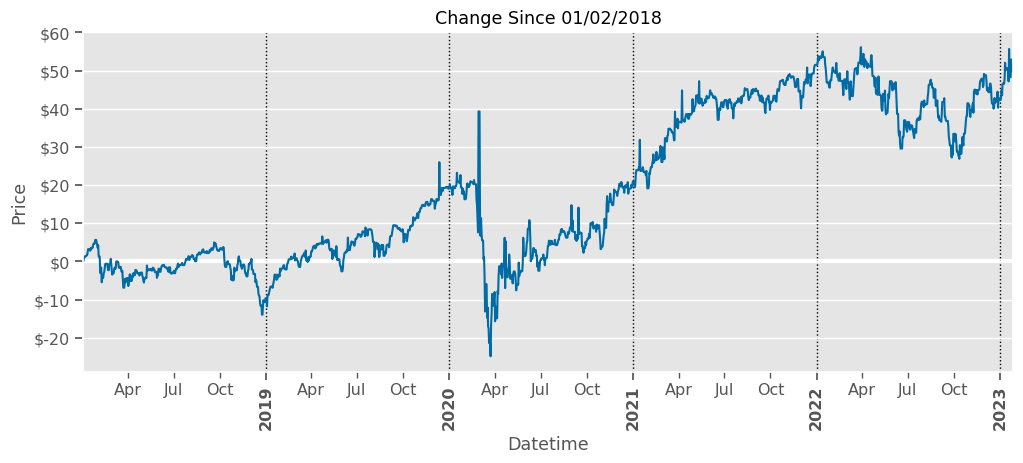

In [23]:
ax = quick_ts_plot(ts_change_since, 
                   title=f'Change Since {date_for_norm}')
ax.yaxis.set_major_formatter(fmt_usd)
ax.axhline(0,color='white',lw=3,zorder=0)

In [24]:
## Calculate % Change Since Date   
ts_change_since = ts - value_for_norm
ts_pct_change_since = ts_change_since/value_for_norm * 100
ts_pct_change_since

Datetime
2018-01-02     0.000000
2018-01-03     0.408600
2018-01-04     0.943672
2018-01-05     1.264714
2018-01-06     1.264714
                ...    
2023-01-23    51.503065
2023-01-24    48.506664
2023-01-25    48.769336
2023-01-26    50.004864
2023-01-27    50.296721
Freq: D, Name: AskClose, Length: 1852, dtype: float64

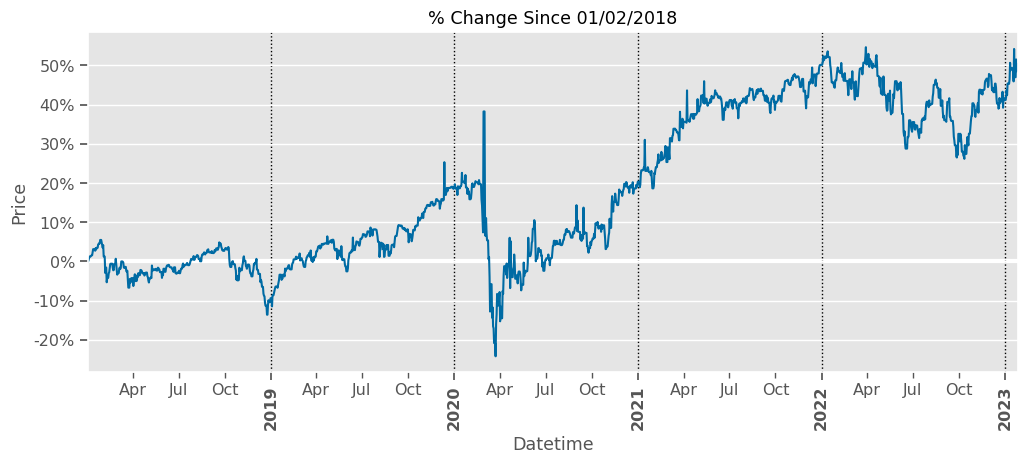

In [25]:
ax = quick_ts_plot(ts_pct_change_since, 
                   title=f'% Change Since {date_for_norm}')
ax.yaxis.set_major_formatter(fmt_pct)
ax.axhline(0,color='white',lw=3,zorder=0)

### ❌ Normalizing the data to lowest price

In [26]:
## Save date to normalize to and value to normalize to
date_for_norm = ts.idxmin().strftime('%m/%d/%Y')
value_for_norm = ts.loc[date_for_norm]
value_for_norm

77.93

In [27]:
## Calculate Diff Since Date   
ts_change_since = ts - value_for_norm
ts_change_since

Datetime
2018-01-02    24.86
2018-01-03    25.28
2018-01-04    25.83
2018-01-05    26.16
2018-01-06    26.16
              ...  
2023-01-23    77.80
2023-01-24    74.72
2023-01-25    74.99
2023-01-26    76.26
2023-01-27    76.56
Freq: D, Name: AskClose, Length: 1852, dtype: float64

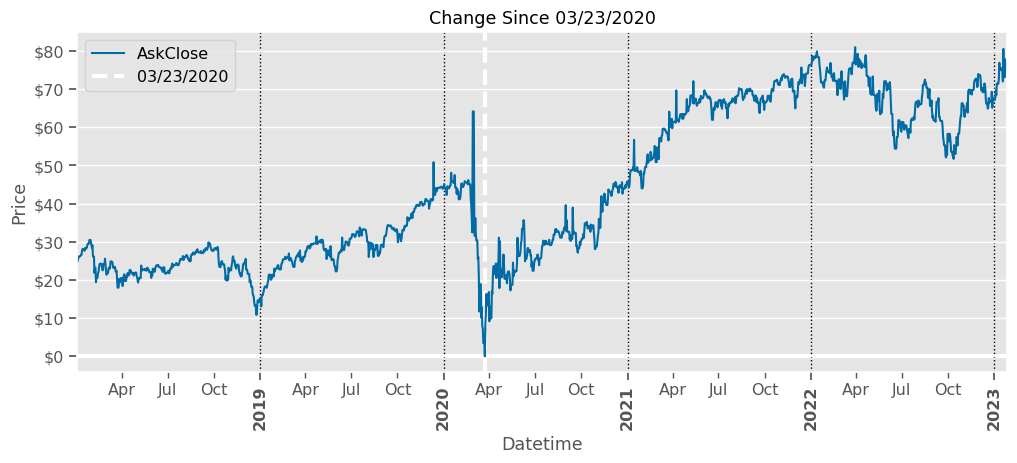

In [28]:
ax = quick_ts_plot(ts_change_since, title=f'Change Since {date_for_norm}')

ax.yaxis.set_major_formatter(fmt_usd)
ax.axhline(0,color='white',lw=3,zorder=0)
ax.axvline(date_for_norm,color='white',lw=3,zorder=0, ls='--',
           label=date_for_norm)
ax.legend()

In [29]:
## Calculate % Change Since Date   
ts_pct_change_since = (ts - value_for_norm)/value_for_norm * 100
ts_pct_change_since

Datetime
2018-01-02    31.900423
2018-01-03    32.439369
2018-01-04    33.145130
2018-01-05    33.568587
2018-01-06    33.568587
                ...    
2023-01-23    99.833184
2023-01-24    95.880919
2023-01-25    96.227384
2023-01-26    97.857051
2023-01-27    98.242012
Freq: D, Name: AskClose, Length: 1852, dtype: float64

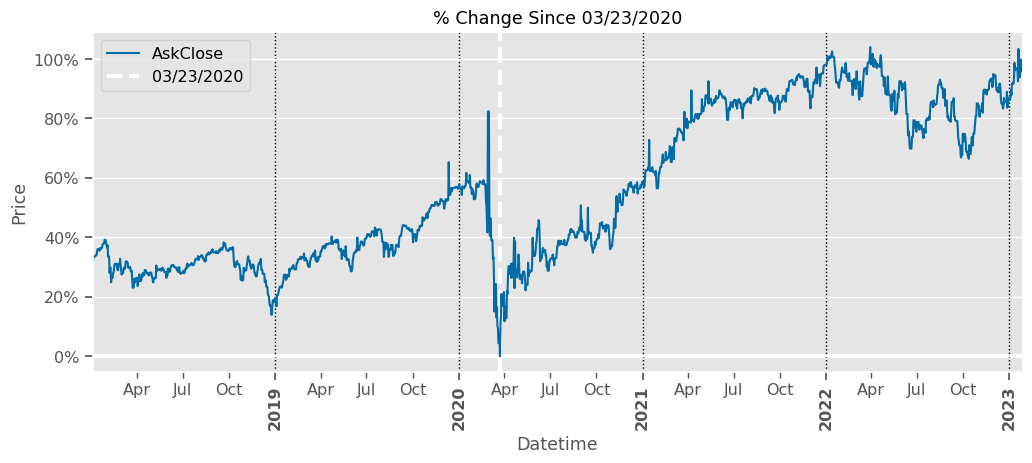

In [30]:
ax = quick_ts_plot(ts_pct_change_since, 
                   title=f'% Change Since {date_for_norm}')
ax.yaxis.set_major_formatter(fmt_pct)
ax.axhline(0,color='white',lw=3,zorder=0)

ax.axvline(date_for_norm,color='white',lw=3,zorder=0, ls='--',
           label=date_for_norm)
ax.legend()

## Seasonality

In [31]:
ts

Datetime
2018-01-02    102.79
2018-01-03    103.21
2018-01-04    103.76
2018-01-05    104.09
2018-01-06    104.09
               ...  
2023-01-23    155.73
2023-01-24    152.65
2023-01-25    152.92
2023-01-26    154.19
2023-01-27    154.49
Freq: D, Name: AskClose, Length: 1852, dtype: float64

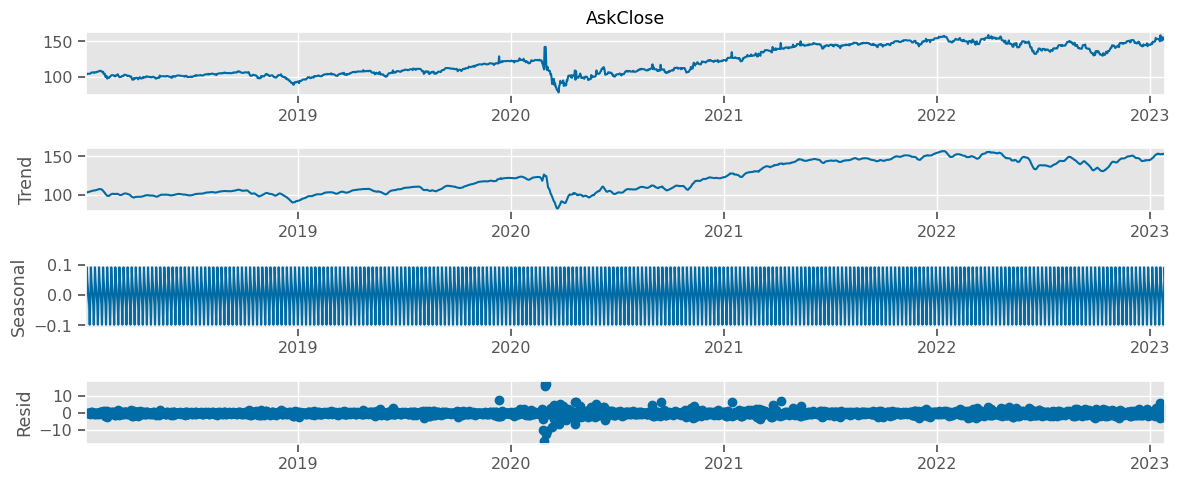

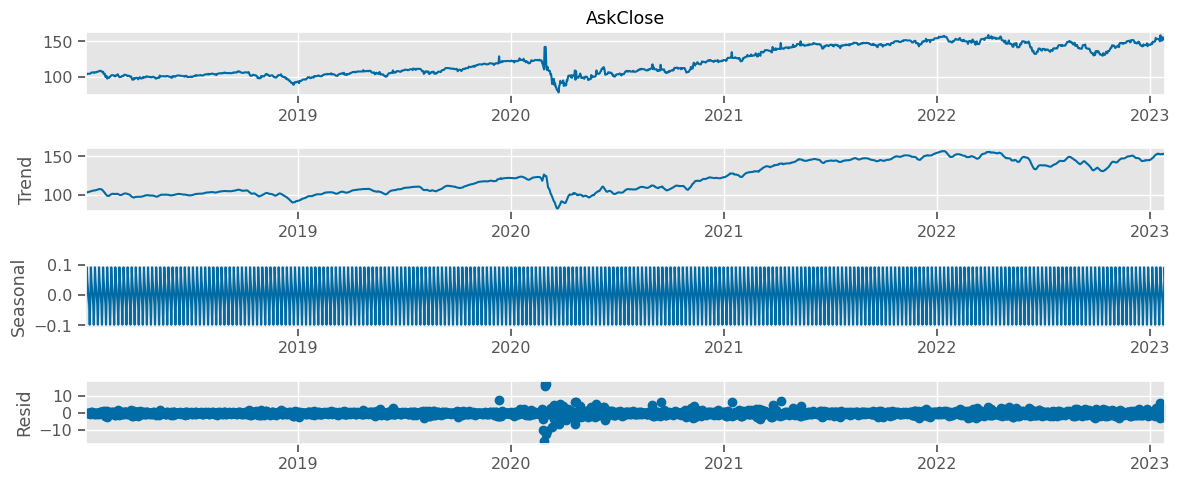

In [32]:
import statsmodels.tsa.api as tsa
decomp = tsa.seasonal_decompose(ts)
decomp.plot()

In [33]:
ts.loc["2020":]

Datetime
2020-01-01    122.18
2020-01-02    123.02
2020-01-03    121.89
2020-01-04    121.89
2020-01-05    121.89
               ...  
2023-01-23    155.73
2023-01-24    152.65
2023-01-25    152.92
2023-01-26    154.19
2023-01-27    154.49
Freq: D, Name: AskClose, Length: 1123, dtype: float64

In [34]:
# ts_m.loc[date_slice]
ts_check_season = ts.loc["2020":]
ts_check_season

Datetime
2020-01-01    122.18
2020-01-02    123.02
2020-01-03    121.89
2020-01-04    121.89
2020-01-05    121.89
               ...  
2023-01-23    155.73
2023-01-24    152.65
2023-01-25    152.92
2023-01-26    154.19
2023-01-27    154.49
Freq: D, Name: AskClose, Length: 1123, dtype: float64

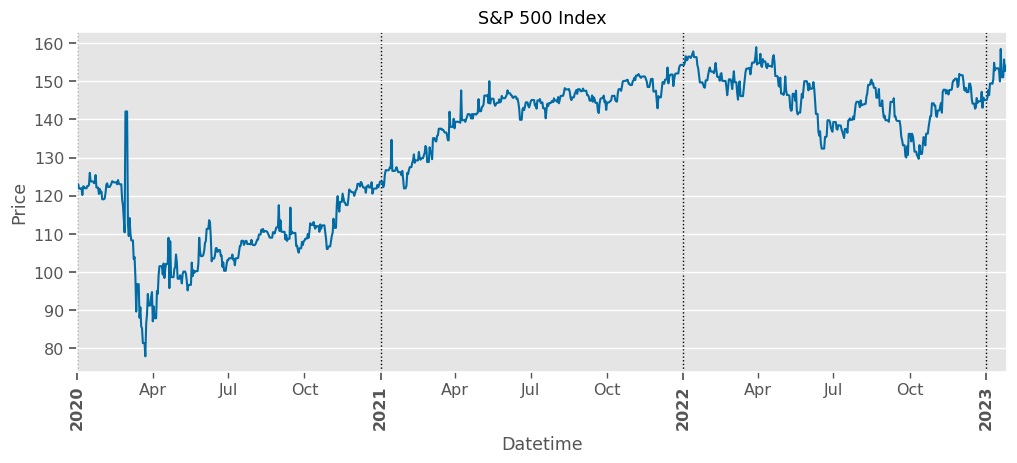

In [35]:
quick_ts_plot(ts_check_season);

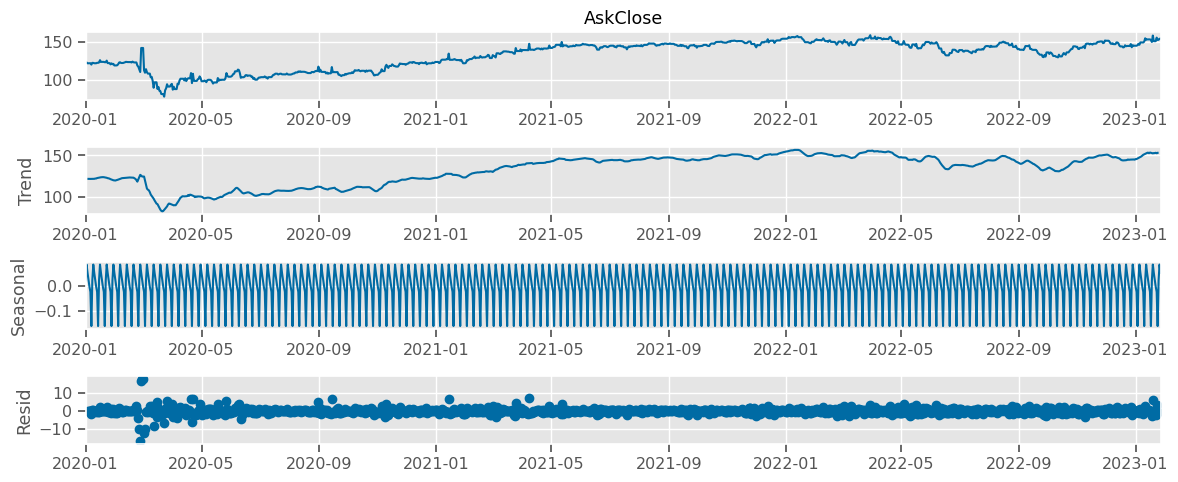

In [36]:
decomp = tsa.seasonal_decompose(ts_check_season)
decomp.plot();

In [37]:
seasonal = decomp.seasonal
seasonal

Datetime
2020-01-01    0.023277
2020-01-02    0.087437
2020-01-03    0.053861
2020-01-04    0.024696
2020-01-05   -0.002751
                ...   
2023-01-23   -0.023706
2023-01-24   -0.162813
2023-01-25    0.023277
2023-01-26    0.087437
2023-01-27    0.053861
Freq: D, Name: seasonal, Length: 1123, dtype: float64

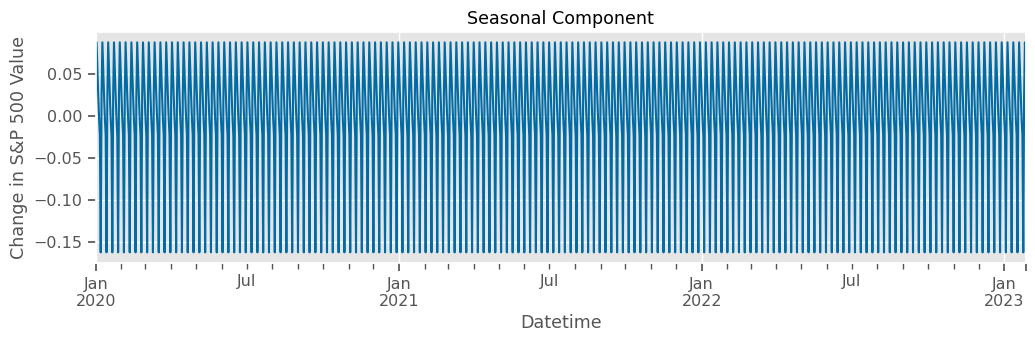

In [38]:
ax = seasonal.plot(figsize=(12,3))
ax.set(ylabel='Change in S&P 500 Value',
      title='Seasonal Component');

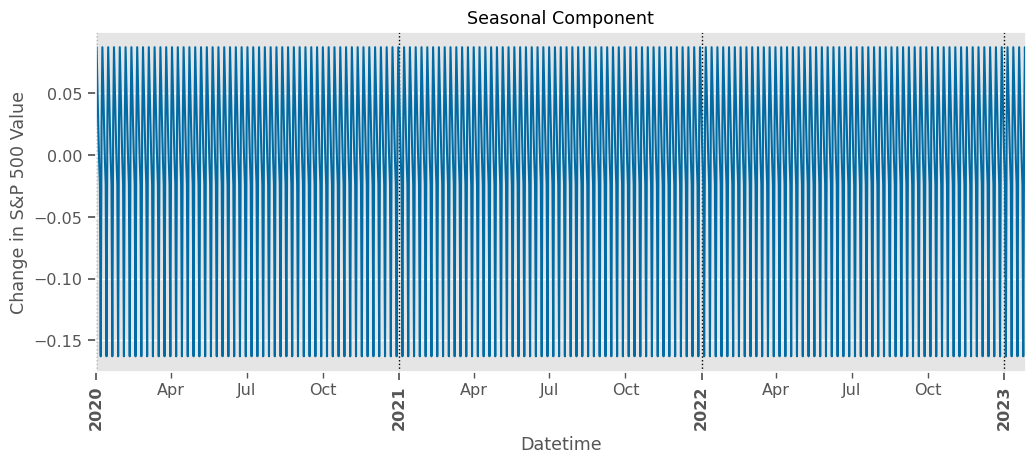

In [39]:
ax =quick_ts_plot(seasonal)
ax.set(ylabel='Change in S&P 500 Value',
      title='Seasonal Component');

#### Using scipy's find_peaks

In [40]:
from scipy.signal import find_peaks
peaks, props = find_peaks(seasonal, height=seasonal.max())

In [41]:
peaks

array([   1,    8,   15,   22,   29,   36,   43,   50,   57,   64,   71,
         78,   85,   92,   99,  106,  113,  120,  127,  134,  141,  148,
        155,  162,  169,  176,  183,  190,  197,  204,  211,  218,  225,
        232,  239,  246,  253,  260,  267,  274,  281,  288,  295,  302,
        309,  316,  323,  330,  337,  344,  351,  358,  365,  372,  379,
        386,  393,  400,  407,  414,  421,  428,  435,  442,  449,  456,
        463,  470,  477,  484,  491,  498,  505,  512,  519,  526,  533,
        540,  547,  554,  561,  568,  575,  582,  589,  596,  603,  610,
        617,  624,  631,  638,  645,  652,  659,  666,  673,  680,  687,
        694,  701,  708,  715,  722,  729,  736,  743,  750,  757,  764,
        771,  778,  785,  792,  799,  806,  813,  820,  827,  834,  841,
        848,  855,  862,  869,  876,  883,  890,  897,  904,  911,  918,
        925,  932,  939,  946,  953,  960,  967,  974,  981,  988,  995,
       1002, 1009, 1016, 1023, 1030, 1037, 1044, 10

In [42]:
peak_dates = seasonal.index[peaks]
peak_dates

DatetimeIndex(['2020-01-02', '2020-01-09', '2020-01-16', '2020-01-23',
               '2020-01-30', '2020-02-06', '2020-02-13', '2020-02-20',
               '2020-02-27', '2020-03-05',
               ...
               '2022-11-24', '2022-12-01', '2022-12-08', '2022-12-15',
               '2022-12-22', '2022-12-29', '2023-01-05', '2023-01-12',
               '2023-01-19', '2023-01-26'],
              dtype='datetime64[ns]', name='Datetime', length=161, freq=None)

## Rolling Statistics

In [43]:
ts = df.loc["2021":"2022",'AskClose'].copy()
ts = ts.resample("d").last()
ts = ts.fillna(method='ffill')
ts

Datetime
2021-01-04    122.23
2021-01-05    122.91
2021-01-06    125.61
2021-01-07    126.69
2021-01-08    126.67
               ...  
2022-12-26    144.75
2022-12-27    147.25
2022-12-28    143.07
2022-12-29    145.74
2022-12-30    145.08
Freq: D, Name: AskClose, Length: 726, dtype: float64

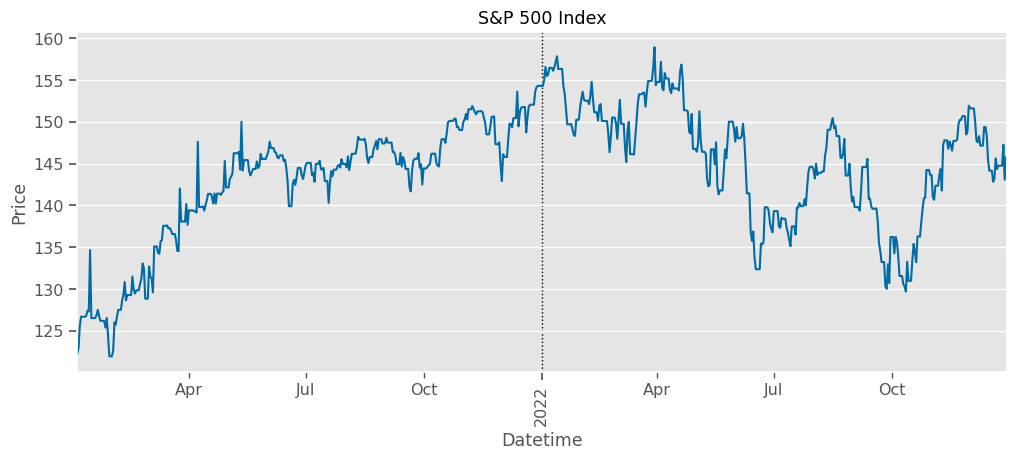

In [44]:
ax = quick_ts_plot(ts, bold_ticks=False);

### Rolling mean

To calculate a moving average, using `ts.rolling(x).mean()`
where x is the # of intervals to average over. 


In [45]:
ts

Datetime
2021-01-04    122.23
2021-01-05    122.91
2021-01-06    125.61
2021-01-07    126.69
2021-01-08    126.67
               ...  
2022-12-26    144.75
2022-12-27    147.25
2022-12-28    143.07
2022-12-29    145.74
2022-12-30    145.08
Freq: D, Name: AskClose, Length: 726, dtype: float64

In [46]:
# calculate 5 day moving avg
ma5 = ts.rolling(5).mean()
ma5

Datetime
2021-01-04        NaN
2021-01-05        NaN
2021-01-06        NaN
2021-01-07        NaN
2021-01-08    124.822
               ...   
2022-12-26    144.668
2022-12-27    145.250
2022-12-28    144.914
2022-12-29    145.112
2022-12-30    145.178
Freq: D, Name: AskClose, Length: 726, dtype: float64

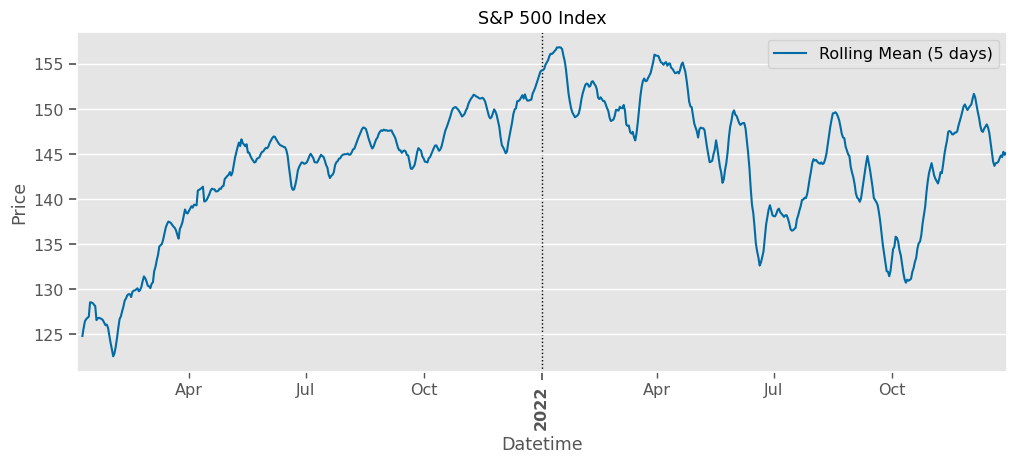

In [47]:
ax = quick_ts_plot(ma5, label='Rolling Mean (5 days)', legend=True);

In [107]:
ts.rolling(5).mean()

Datetime
2018-01-02           NaN
2018-01-03           NaN
2018-01-04           NaN
2018-01-05           NaN
2018-01-06           NaN
                 ...    
2023-01-23    152.875714
2023-01-24    152.861429
2023-01-25    153.282857
2023-01-26    152.671429
2023-01-27    153.160000
Freq: D, Name: AskClose, Length: 1852, dtype: float64

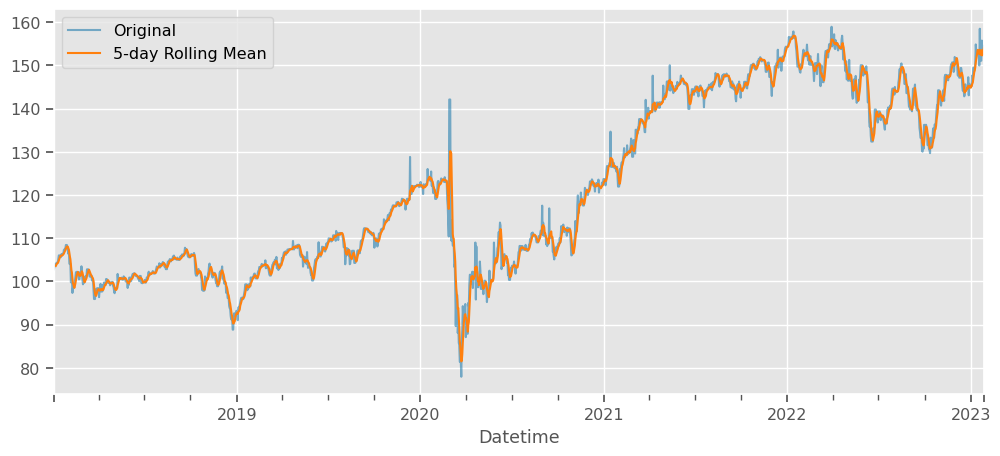

In [111]:
ax = ts.plot(label='Original', alpha=.5)
ax.plot(ts.rolling(5).mean(), label='5-day Rolling Mean')
ax.legend()

<Axes: xlabel='Datetime'>

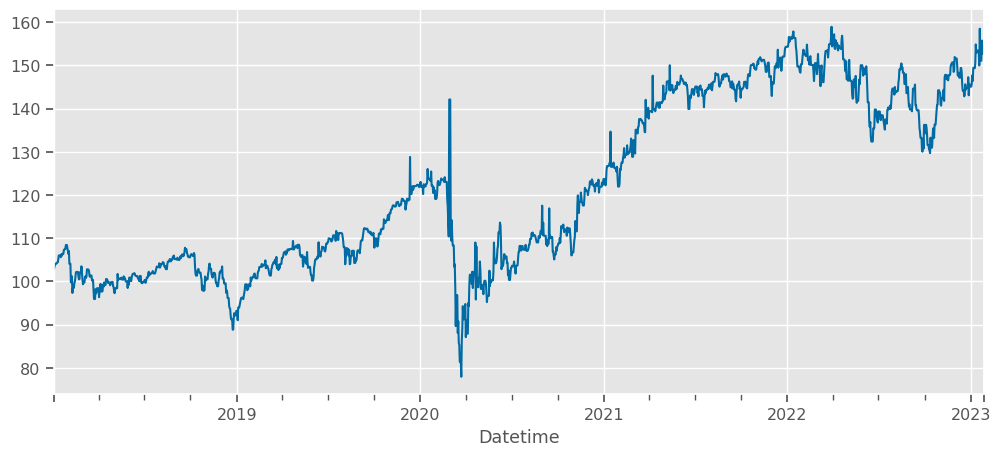

In [99]:
ts.plot()

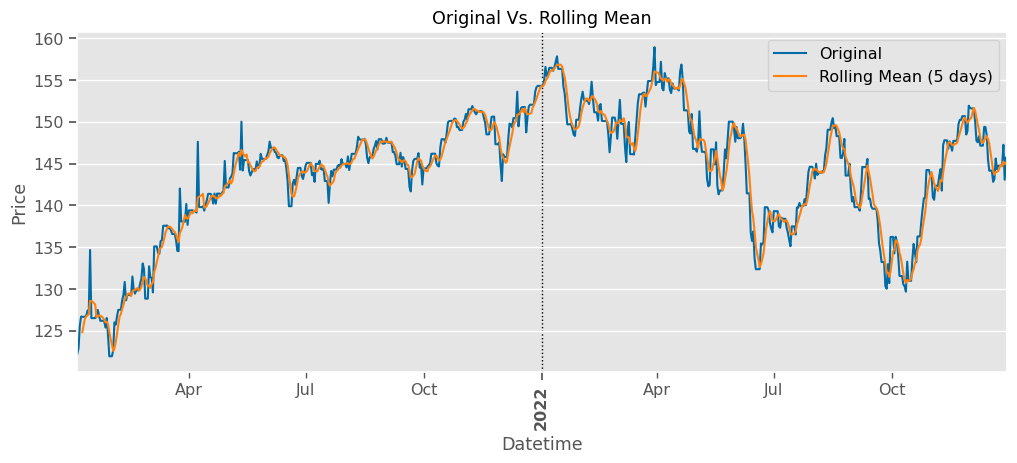

In [48]:
ma5 = ts.rolling(5).mean()
title = 'Original Vs. Rolling Mean'
ax =quick_ts_plot(ts, label='Original')#,plot_kws={'lw':2})
quick_ts_plot(ma5, label='Rolling Mean (5 days)',title=title,
              ax=ax,style='-',legend=True,);

### Rolling std

In [113]:
std5 = ts.rolling(5).std()
std5

Datetime
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-06    0.572992
                ...   
2023-01-23    3.441906
2023-01-24    2.026356
2023-01-25    1.906888
2023-01-26    1.749005
2023-01-27    1.250792
Freq: D, Name: AskClose, Length: 1852, dtype: float64

In [117]:
## calculating +/- std
ts_rolling = pd.DataFrame({'std':std5,
                           'mean':ma5,
                           'mean+std':ma5+std5,
                           'mean-std':ma5-std5})
ts_rolling = ts_rolling.dropna()
ts_rolling

,std,mean,mean+std,mean-std
Datetime,,,,
2021-01-08,2.115401,124.822,126.937401,122.706599
2021-01-09,1.631993,125.710,127.341993,124.078007
2021-01-10,0.476361,126.462,126.938361,125.985639
2021-01-11,0.052154,126.698,126.750154,126.645846
2021-01-12,0.321745,126.842,127.163745,126.520255
...,...,...,...,...
2022-12-26,0.183358,144.668,144.851358,144.484642
2022-12-27,1.118034,145.250,146.368034,144.131966
2022-12-28,1.494818,144.914,146.408818,143.419182


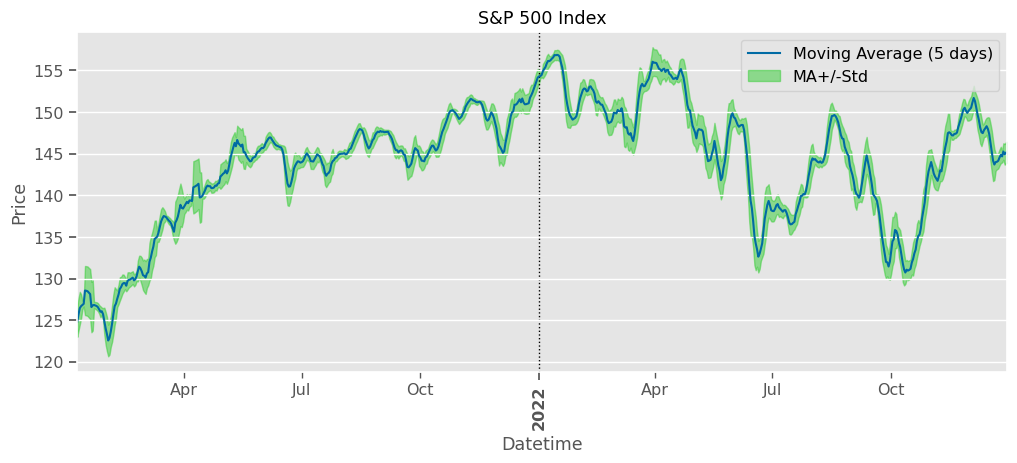

In [110]:
## plot the rolling mean +/- the rolling std
ax = quick_ts_plot(ts_rolling['mean'], label="Moving Average (5 days)")

ax.fill_between(ts_rolling.index, 
                ts_rolling['mean+std'], 
                ts_rolling['mean-std'], 
                color='limegreen',
                alpha=0.5,zorder=0,label="MA+/-Std");
ax.legend();

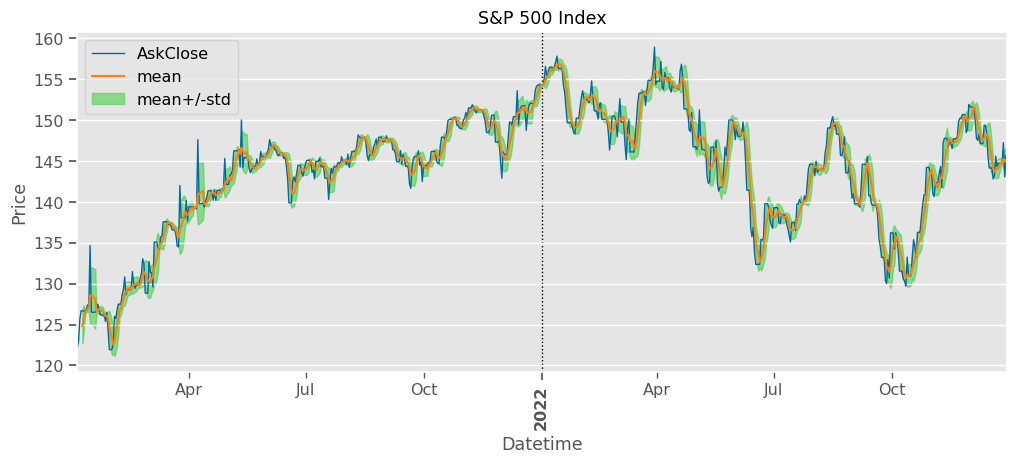

In [52]:
## plot the rolling mean +/- the rolling std
ax = ts.plot(y='mean',lw=1)
ax = quick_ts_plot(ts_rolling['mean'])
ax.fill_between(ts_rolling.index, ts_rolling['mean+std'], ts_rolling['mean-std'], 
                color='limegreen', alpha=0.5,zorder=0,label="mean+/-std");
ax.legend();



### Crypto Example

In [93]:
crypto = pd.read_csv('Data/FromClass/crypto_currencies.csv',
                    parse_dates=['Date'], index_col='Date')
crypto = crypto.loc["2021"]
crypto

,Bitcoin,Dogecoin,Etherium
Date,,,
2021-01-01,29374.152344,0.005685,730.367554
2021-01-02,32127.267578,0.010615,774.534973
2021-01-03,32782.023438,0.009771,975.507690
2021-01-04,31971.914062,0.009767,1040.233032
2021-01-05,33992.429688,0.009920,1100.006104
...,...,...,...
2021-12-27,50640.417969,0.187705,4037.547607
2021-12-28,47588.855469,0.174117,3800.893066
2021-12-29,46444.710938,0.167765,3628.531738


In [94]:
def calc_rolling_mean_std(ts,window=5):
    ma = ts.rolling(window).mean()
    std = ts.rolling(window).std()
    ## calculating +/- std
    ts_rolling = pd.DataFrame({'mean+std':ma+std,
                               'mean':ma,
                               'mean-std':ma-std})
    ts_rolling = ts_rolling.dropna()
    return ts_rolling

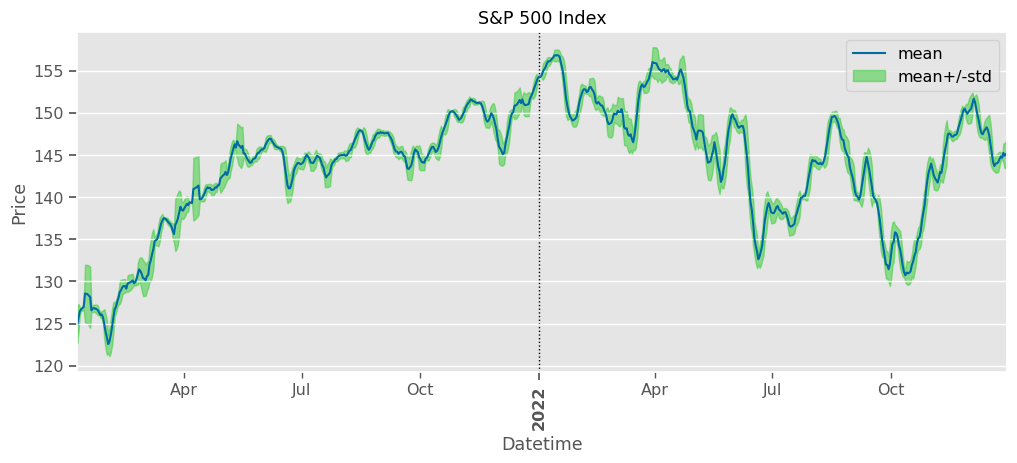

In [95]:

ax = quick_ts_plot(ts_rolling['mean'])
ax.fill_between(ts_rolling.index, ts_rolling['mean+std'], ts_rolling['mean-std'], 
                color='limegreen', alpha=0.5,zorder=0,label="mean+/-std");
ax.legend();

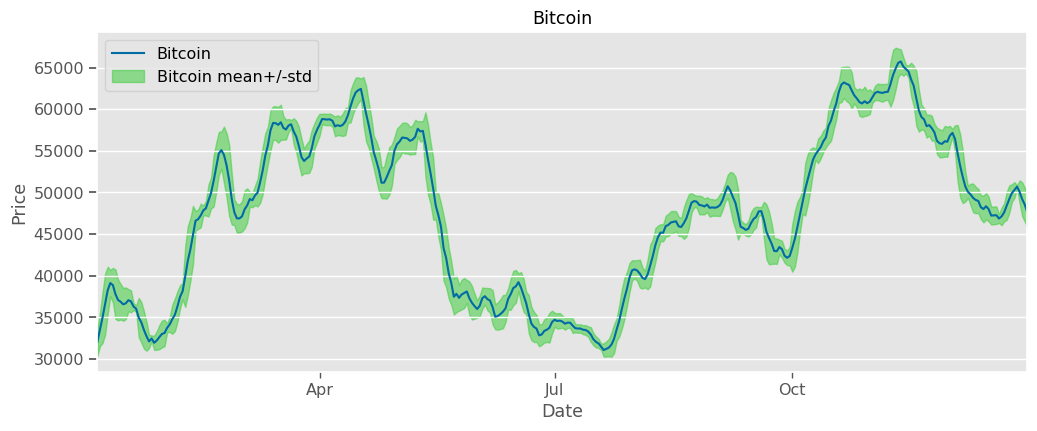

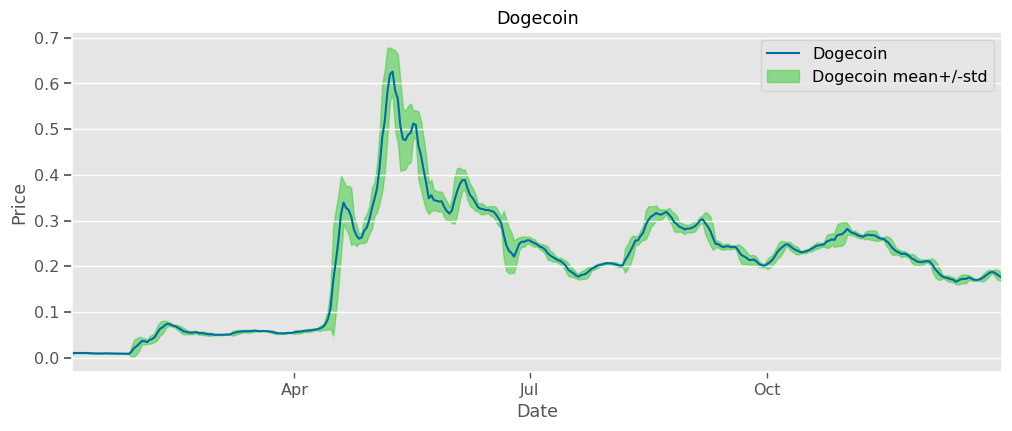

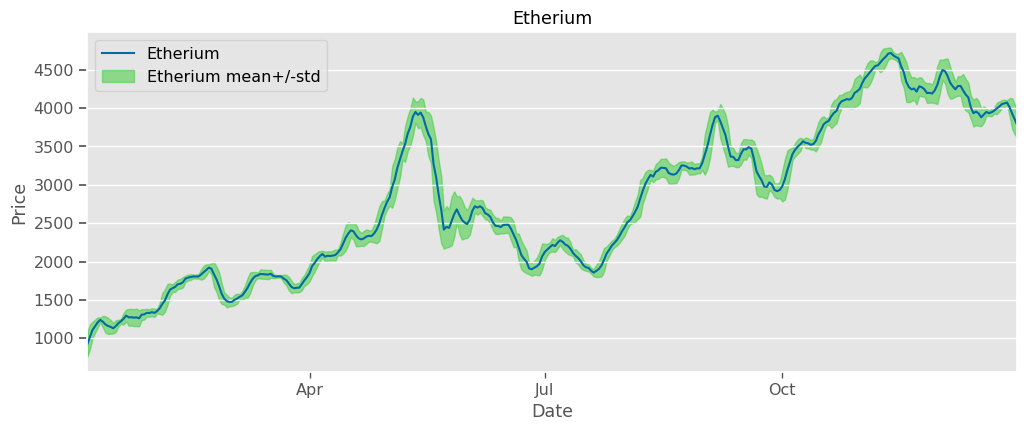

In [96]:
crypto_rolling_means = {}
#
# fig, ax = plt.subplots()

for col in crypto.columns:
    ts_rolling = calc_rolling_mean_std(crypto[col])
    crypto_rolling_means[col]  =  ts_rolling
    
    ax = quick_ts_plot(ts_rolling['mean'], label=col,title=col)
    ax.fill_between(ts_rolling.index, ts_rolling['mean+std'], ts_rolling['mean-std'], 
                color='limegreen', alpha=0.5,zorder=0,label=f"{col} mean+/-std");
    ax.legend();
    plt.show()